**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
twodf = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
twodf.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [4]:
twodf.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
twodf.shape

(310, 7)

In [6]:
twodf.info()
# no missing value
# data type information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
twodf["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [8]:
twodf.describe(include="all")

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


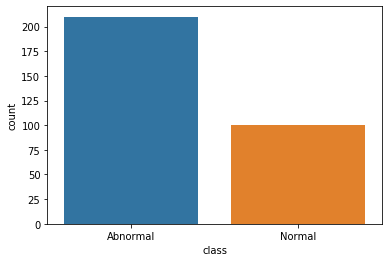

In [9]:
# Class variable plot
sns.countplot(x="class",data=twodf)

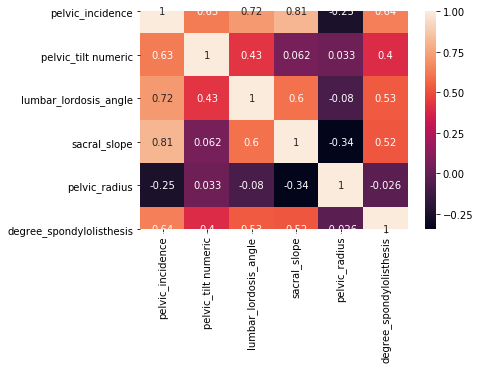

In [10]:
c1 = twodf.corr()
sns.heatmap(c1,annot=True)

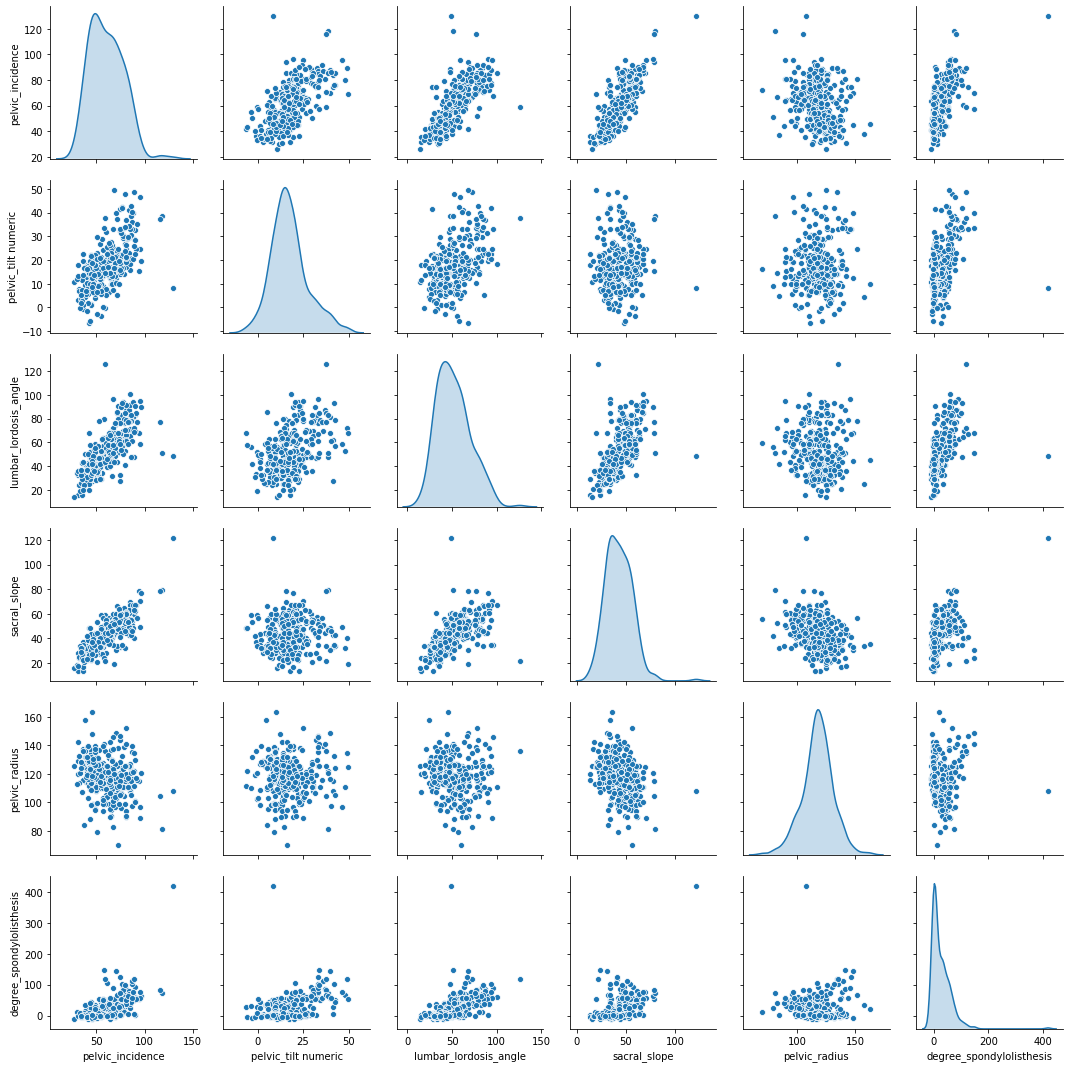

In [11]:
sns.pairplot(twodf,diag_kind="kde")

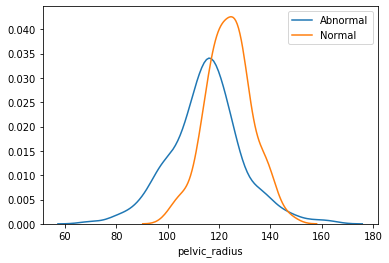

In [12]:
sns.distplot(twodf[twodf["class"] == "Abnormal"]["pelvic_radius"],label="Abnormal",hist=False)
sns.distplot(twodf[twodf["class"] == "Normal"]["pelvic_radius"],label = "Normal",hist=False)

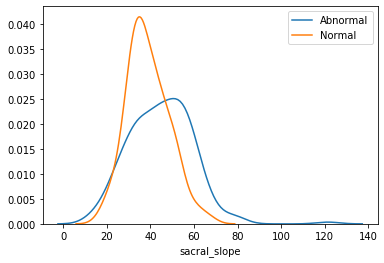

In [13]:
sns.distplot(twodf[twodf["class"] == "Abnormal"]["sacral_slope"],label="Abnormal",hist=False)
sns.distplot(twodf[twodf["class"] == "Normal"]["sacral_slope"],label = "Normal",hist=False)

# Encode the Class variable to integer.

In [14]:
from sklearn.preprocessing import LabelEncoder

twodf["class"] = LabelEncoder().fit_transform(twodf["class"])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [15]:
twodfcopy = twodf.copy()

In [16]:
y = np.array(twodf["class"])

In [17]:
X = twodf.drop(columns="class")

# Normalize your Data (X) to get values between 0 to 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [18]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

# Split the dat as train and test with a ratio of 70:30.

In [36]:
from sklearn.model_selection import train_test_split
X_train_minmax,X_test_minmax,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , metric="euclidean" )

In [39]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
predicted = NNH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [41]:
sco = NNH.score(X_test,y_test)
print("Score:",sco)

Score: 0.7741935483870968


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [42]:
for k in range(3,50,2):
    NNH = KNeighborsClassifier(n_neighbors= k , metric="euclidean" )
    NNH.fit(X_train,y_train)
    print("For k = %d, the value of accuracy is %f"%(k,NNH.score(X_test,y_test)))

For k = 3, the value of accuracy is 0.774194
For k = 5, the value of accuracy is 0.774194
For k = 7, the value of accuracy is 0.763441
For k = 9, the value of accuracy is 0.763441
For k = 11, the value of accuracy is 0.795699
For k = 13, the value of accuracy is 0.763441
For k = 15, the value of accuracy is 0.752688
For k = 17, the value of accuracy is 0.774194
For k = 19, the value of accuracy is 0.784946
For k = 21, the value of accuracy is 0.795699
For k = 23, the value of accuracy is 0.817204
For k = 25, the value of accuracy is 0.806452
For k = 27, the value of accuracy is 0.806452
For k = 29, the value of accuracy is 0.795699
For k = 31, the value of accuracy is 0.817204
For k = 33, the value of accuracy is 0.817204
For k = 35, the value of accuracy is 0.817204
For k = 37, the value of accuracy is 0.827957
For k = 39, the value of accuracy is 0.817204
For k = 41, the value of accuracy is 0.817204
For k = 43, the value of accuracy is 0.817204
For k = 45, the value of accuracy is 0

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [25]:
df3 = pd.read_csv("3Classdata.csv")

In [43]:
df3.shape

(310, 7)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [46]:
df3.describe(include="all")

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [51]:
df3["class"].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

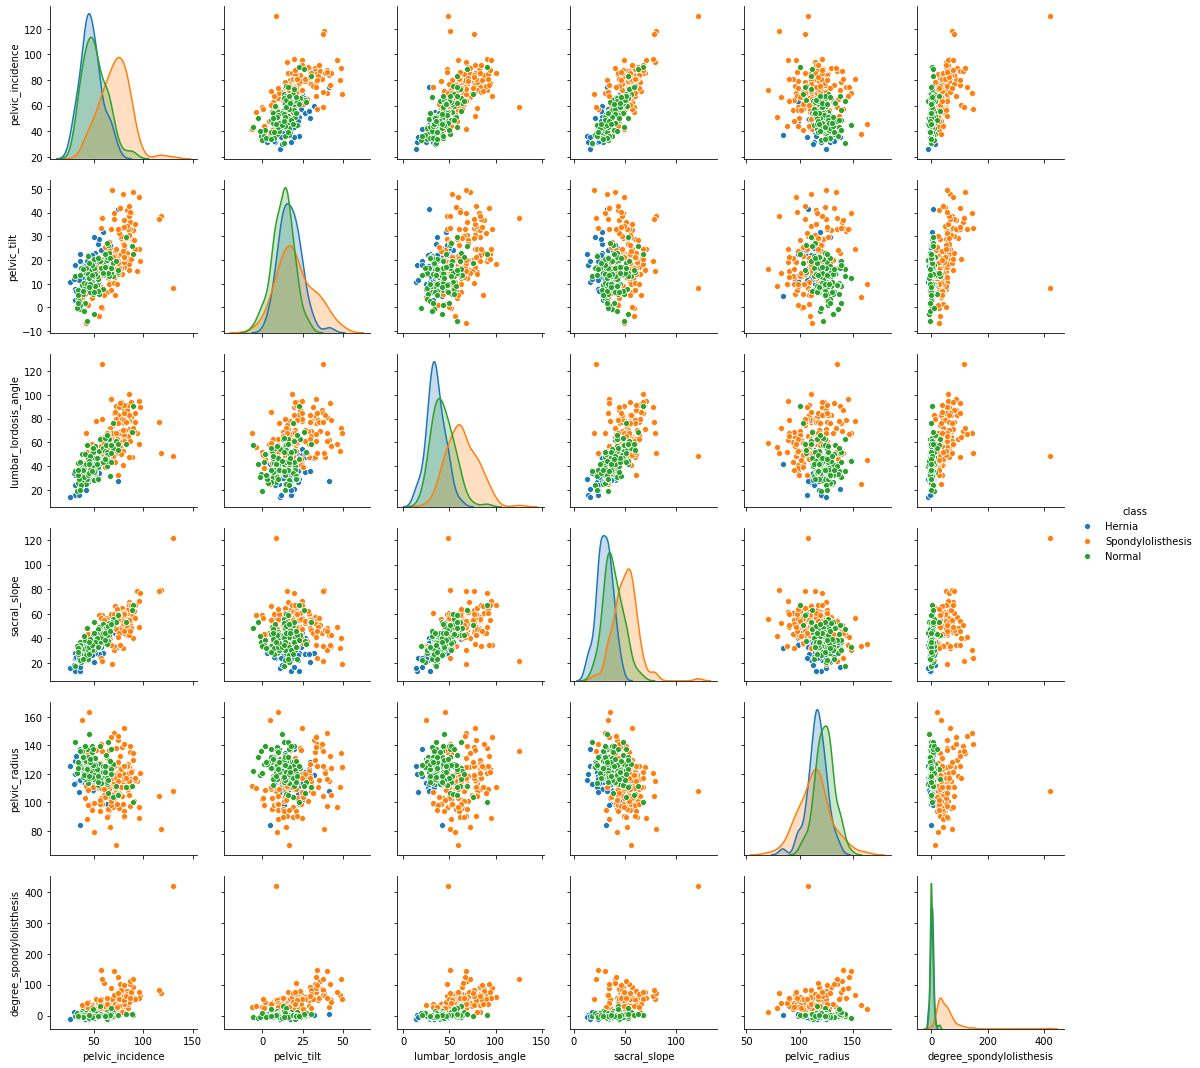

In [49]:
sns.pairplot(diag_kind="kde",hue="class",data=df3)

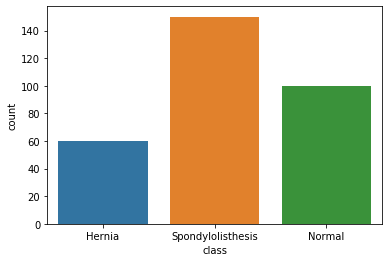

In [53]:
sns.countplot(x="class" ,data=df3)

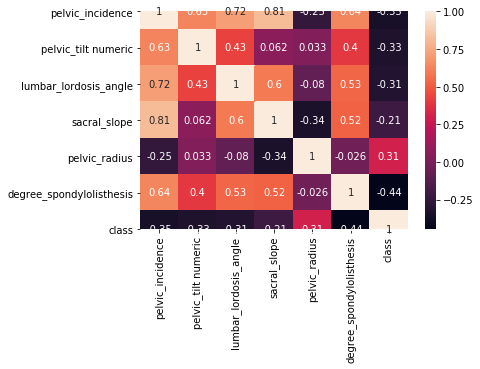

In [52]:
c1 = twodf.corr()
sns.heatmap(c1,annot=True)

In [61]:
from sklearn.preprocessing import LabelEncoder
df3["class"] = LabelEncoder().fit_transform(df3["class"])

In [60]:
df3["class"].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [66]:
df3["class"].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

In [71]:
X = np.array(df3.drop(columns="class",axis=1))
y = np.array(df3["class"])

In [75]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state=10)

In [78]:
(X_train.shape,X_test.shape)

((217, 6), (93, 6))

In [79]:
(y_train.shape,y_test.shape)

((217,), (93,))